## Graphs

in this notebook you will see:

- how to build simple social network graphs
- how to customise the graphs with extra variables (and how to use them)
- building directional graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint as pp

### Create your own graph

We can simply start adding edges by naming the nodes that are connected. Here, a weight is immediately included as well, altough that is optional:

In [2]:
G = nx.Graph()



G.add_edge('beyonce','mia', weight = 5)
G.add_edge('beyonce','azealia', weight = 1)
G.add_edge('beyonce','jayz', weight = 1)
G.add_edge('beyonce','madonna', weight = 2)
G.add_edge('madonna','azealia', weight = 1)
G.add_edge('nicki','azealia', weight = 1)

In [3]:
print('Edges')
print( G.number_of_edges())
print( G.edges())
print( )

print('Nodes')
print( G.number_of_nodes())
print( G.nodes())


Edges
6
[('beyonce', 'mia'), ('beyonce', 'azealia'), ('beyonce', 'jayz'), ('beyonce', 'madonna'), ('azealia', 'madonna'), ('azealia', 'nicki')]

Nodes
6
['beyonce', 'mia', 'azealia', 'jayz', 'madonna', 'nicki']


We can obtain various statistics regarding nodes:

In [4]:
for node in G.nodes():
    print('Number of neighbours of ', node, ':\t', len(G.adj[node]))
    print('Neighbours of ', node, ': ', G.adj[node])
    print('Degree: ', G.degree(node))
    print()

Number of neighbours of  beyonce :	 4
Neighbours of  beyonce :  {'mia': {'weight': 5}, 'azealia': {'weight': 1}, 'jayz': {'weight': 1}, 'madonna': {'weight': 2}}
Degree:  4

Number of neighbours of  mia :	 1
Neighbours of  mia :  {'beyonce': {'weight': 5}}
Degree:  1

Number of neighbours of  azealia :	 3
Neighbours of  azealia :  {'beyonce': {'weight': 1}, 'madonna': {'weight': 1}, 'nicki': {'weight': 1}}
Degree:  3

Number of neighbours of  jayz :	 1
Neighbours of  jayz :  {'beyonce': {'weight': 1}}
Degree:  1

Number of neighbours of  madonna :	 2
Neighbours of  madonna :  {'beyonce': {'weight': 2}, 'azealia': {'weight': 1}}
Degree:  2

Number of neighbours of  nicki :	 1
Neighbours of  nicki :  {'azealia': {'weight': 1}}
Degree:  1



In [5]:
node_of_interest = "beyonce"

for node in G.neighbors(node_of_interest):
    print(node_of_interest, 'is a connected to', node )

beyonce is a connected to mia
beyonce is a connected to azealia
beyonce is a connected to jayz
beyonce is a connected to madonna


Drawing a graph is relatively straightforward as well:

{'azealia': array([0.39789858, 0.39571811]),
 'beyonce': array([-0.19317522, -0.26112305]),
 'jayz': array([-0.93996742, -0.63925666]),
 'madonna': array([-0.18521633,  0.27349955]),
 'mia': array([-0.07953961, -0.66199146]),
 'nicki': array([1.       , 0.8931535])}


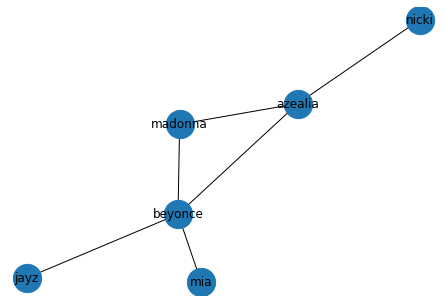

In [13]:
# Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)  #uses weight to decide the position. 
pp.pprint(pos)

nx.draw(G, pos, with_labels= True, node_size = 800)
plt.show()

Re-scaling the size of the nodes:

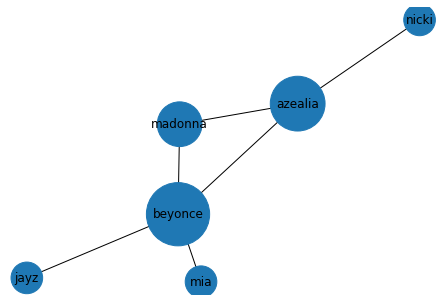

In [14]:
sizes = [G.degree(node) * 1000 # multiply
         for node in G.nodes()
        ]
    
# pos = nx.spring_layout(G) 
# notice, you do not need to re-calculate spring layout, can just reuse previous positions 

nx.draw(G, pos, with_labels= True, node_size = sizes)
plt.show()

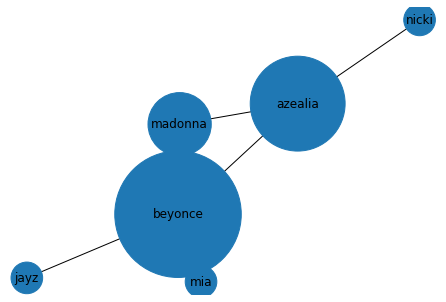

In [19]:
sizes = [G.degree(node) **2 * 1000 # exponential. in python **2 means 'to the power of 2'
         for node in G.nodes()
        ]
    
# pos = nx.spring_layout(G) 
# notice, you do not need to re-calculate spring layout, can just reuse previous positions 

nx.draw(G, pos, with_labels= True, node_size = sizes)
plt.show()

### Extra variables

We can assign extra variables to a connection. This can be done either when you are creating nodes, or once they are already created. You might have reasons for one or the other. 

- Adding variables when creating a node is easier, eg when you're loading values from a file.
- Adding variables once the graph G is greated can give you values, such as position, or degree

[1, 2, 5, 1, 2, 1]


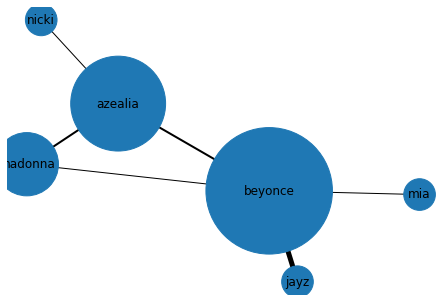

In [20]:
G = nx.Graph()

# here I am adding a value for each connection, showing how many times they played on superbowl3 
# (note, this is not accurate data)
# you can come up with ANY variable name you want, and it will be added to the edge data

G.add_edge('beyonce','mia', weight = 5)
G.add_edge('beyonce','azealia', weight = 1, recorded_together = 2)
G.add_edge('beyonce','jayz', weight = 1, recorded_together = 5)
G.add_edge('beyonce','madonna', weight = 1)
G.add_edge('madonna','azealia', weight = 1, recorded_together = 2)
G.add_edge('nicki','azealia', weight = 1)

# get widths by getting value of 'recorded_together' from each edge's data
widths = [G[edge[0]][edge[1]].get('recorded_together',1)
          for edge in G.edges()]

sizes = [G.degree(node) **2 * 1000 # exponential. in python **2 means 'to the power of 2'
         for node in G.nodes()
        ]

# exponential. in python **2 means 'to the power of 2'

#recap: some_dictionary.get() takes two arguments: key to find, and default value if key not present

print(widths)
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

For various reasons you might also want to add variables to edges once the graph was created. 

You could do it like in the example below where we access value of a node that had to be calculated (eg. number of neighbours, or other metric)

In [34]:
for edge in G.edges():
    print("edge as tupple:",edge)
    source = edge[0]
    target = edge[1]
    source_neighbours_count =  len(list(G.neighbors(source)))
    target_neighbours_count = len(list(G.neighbors(target)))
    G[source][target]['total_neighbours'] = source_neighbours_count + target_neighbours_count
    
for edge in G.edges():
    print(G.get_edge_data(edge[0], edge[1]))


edge as tupple: ('beyonce', 'mia')
edge as tupple: ('beyonce', 'azealia')
edge as tupple: ('beyonce', 'jayz')
edge as tupple: ('beyonce', 'madonna')
edge as tupple: ('azealia', 'madonna')
edge as tupple: ('azealia', 'nicki')
{'weight': 5, 'total_neighbours': 5}
{'weight': 1, 'recorded_together': 2, 'total_neighbours': 7}
{'weight': 1, 'recorded_together': 5, 'total_neighbours': 5}
{'weight': 1, 'total_neighbours': 6}
{'weight': 1, 'recorded_together': 2, 'total_neighbours': 5}
{'weight': 1, 'total_neighbours': 4}


These are useful for drawing, e.g., the edge width:

We can add the widths as an argument to the draw function:

[25, 49, 25, 36, 25, 16]


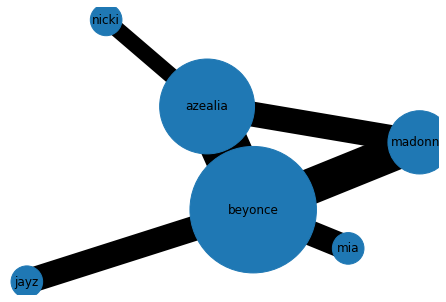

In [35]:
widths = [G[edge[0]][edge[1]].get('total_neighbours',1) **2
          for edge in G.edges()]

print(widths)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

### Directed graphs

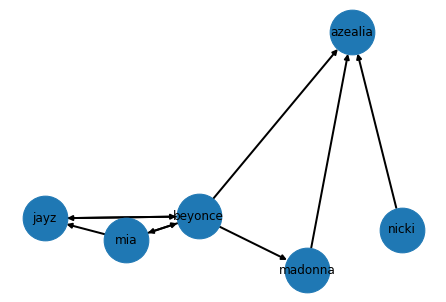

In [36]:
DG = nx.DiGraph()
DG.add_edge('beyonce','mia', weight = 5)
DG.add_edge('beyonce','azealia', weight = 1)
DG.add_edge('beyonce','jayz', weight = 1)
DG.add_edge('beyonce','madonna', weight = 2)
DG.add_edge('madonna','azealia', weight = 1)
DG.add_edge('nicki','azealia', weight = 1)

DG.add_edge('mia','beyonce', weight = 5)
DG.add_edge('jayz','beyonce', weight = 1)
DG.add_edge('mia','jayz', weight = 2)

pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 2000, width=2)
plt.show()

In [37]:
for node in DG.nodes():
    print("Node:", node)
    print('In-edges:', DG.in_edges(node))
    print('Out-edges:', DG.out_edges(node))
    print('In-degree:', DG.in_degree(node))
    print('Out-degree:', DG.out_degree(node))

Node: beyonce
In-edges: [('mia', 'beyonce'), ('jayz', 'beyonce')]
Out-edges: [('beyonce', 'mia'), ('beyonce', 'azealia'), ('beyonce', 'jayz'), ('beyonce', 'madonna')]
In-degree: 2
Out-degree: 4
Node: mia
In-edges: [('beyonce', 'mia')]
Out-edges: [('mia', 'beyonce'), ('mia', 'jayz')]
In-degree: 1
Out-degree: 2
Node: azealia
In-edges: [('beyonce', 'azealia'), ('madonna', 'azealia'), ('nicki', 'azealia')]
Out-edges: []
In-degree: 3
Out-degree: 0
Node: jayz
In-edges: [('beyonce', 'jayz'), ('mia', 'jayz')]
Out-edges: [('jayz', 'beyonce')]
In-degree: 2
Out-degree: 1
Node: madonna
In-edges: [('beyonce', 'madonna')]
Out-edges: [('madonna', 'azealia')]
In-degree: 1
Out-degree: 1
Node: nicki
In-edges: []
Out-edges: [('nicki', 'azealia')]
In-degree: 0
Out-degree: 1


### Useful bits, turning graph into adjacency matrix

The adjacency matrix:

In [38]:

print(nx.to_numpy_matrix(DG))

[[0. 5. 1. 1. 2. 0.]
 [5. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
